### Two categories of geographical data

1. Spatial object: shape and spatial extent matters, map is the main object of interest
 * countries, regions, buildings
2. Non-Spatial geolocated Objects: shape and map does not matter
 * cars, people, weather stations. The role of the map is to only be a reference to see where these objects or phenomena are located

### When/Why to use map

1. When the question is inherently spacial (map vs bar chart)
 * correlate the variable with the spacial location (bikes and subway)
     * [John Snow's Cholera map](https://lh3.googleusercontent.com/proxy/QcL2ijQUKcViWAjxrSRVaNkYb0Zw9eyfniKt1OjkGMO5MW-z7MmpElH6g1rZo71gnWH29AQTI35IqhpGUvRU81Y-lfq9qVbQLVcdZcMQqfMs-1MtTA8kM2YIqfFUKA) (death near water pump)
 * phenomena for which spacial proximity is relevant
     * how far has epidemic extended from its point of origin
     * the rate of infected people in neighboring regions
2. When the map helps find information needed (electoral maps)

### Types of maps

1. Dot Map
 * distribution of objects (density and distribution)
2. Heat Maps
 * distribution of continuous values
3. Binned Maps
 * distribution of discrete or arbitrary values
4. Choropleth Maps
 * distribution of discrete and/or geo values
5. Symbol Maps
 * distribution of discrete and/or geo values

### Issues with maps

1. normalize data
2. insensitivity to sample size

> In probability theory, the law of large numbers (LLN) is a theorem that describes the result of performing the same experiment a large number of times. According to the law, the average of the results obtained from a large number of trials should be close to the expected value, and will tend to become closer as more trials are performed. [link to wikipedia](https://en.wikipedia.org/wiki/Law_of_large_numbers)

3. skewed spatial distributions
 * color intensity is percieved differently by size
4. color perception
 * framing bias

[link 1](https://www.eyesocialeyes.com/wp-content/uploads/2016/03/darker-moving.gif)  
[link 2](http://brainden.com/images/dots-big.gif)

US Agriculture exports: https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv


US Airport traffic: https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv


US cities: https://raw.githubusercontent.com/plotly/datasets/master/2014_us_cities.csv


US state borders: https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json

#Choropleth Maps

In [1]:
import plotly.graph_objs as go
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

In [3]:
df.shape

(50, 17)

In [4]:
df.head()

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton
0,AL,Alabama,state,1390.63,34.4,10.6,481.0,4.06,8.0,17.1,25.11,5.5,8.9,14.33,34.9,70.0,317.61
1,AK,Alaska,state,13.31,0.2,0.1,0.0,0.19,0.0,0.0,0.00,0.6,1.0,1.56,0.0,0.0,0.00
2,AZ,Arizona,state,1463.17,71.3,17.9,0.0,105.48,19.3,41.0,60.27,147.5,239.4,386.91,7.3,48.7,423.95
3,AR,Arkansas,state,3586.02,53.2,29.4,562.9,3.53,2.2,4.7,6.88,4.4,7.1,11.45,69.5,114.5,665.44
4,CA,California,state,16472.88,228.7,11.1,225.4,929.95,2791.8,5944.6,8736.40,803.2,1303.5,2106.79,34.6,249.3,1064.95


In [9]:
data = go.Choropleth(
    locations = df['code'],
    locationmode = 'USA-states',
    z = df['total exports'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255, 255, 255)',
            width = 1.5
        )
    ),
    colorbar = go.choropleth.ColorBar(
        title = 'Millions USD'
    )
)

layout = go.Layout(
    geo = go.layout.Geo(
        scope = 'usa',
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'
        
    )
)


fig = go.Figure(data = data, layout = layout)
fig.show()

# Dot Map

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')

In [11]:
df.shape

(221, 8)

In [12]:
df.head()

,iata,airport,city,state,country,lat,long,cnt
0,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464,25129
1,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944,21925
2,DFW,Dallas-Fort Worth International,Dallas-Fort Worth,TX,USA,32.895951,-97.037200,20662
3,PHX,Phoenix Sky Harbor International,Phoenix,AZ,USA,33.434167,-112.008056,17290
4,DEN,Denver Intl,Denver,CO,USA,39.858408,-104.667002,13781


In [34]:
data = go.Scattergeo(
    lon = df['long'],
    lat = df['lat'],
    text = df['airport'],
    mode = 'markers',
    marker = dict(
        size = 6,
        opacity = 0.5,
        symbol = 'square',
        line = dict(
                width=1,
            color = 'rgba(102, 102, 102, 0.8)'
        ),
        cmin = 0,
        cmax = df['cnt'].max(),
        color = df['cnt'],
        colorbar = dict(
            title = 'Incoming flights'
        )
    )
)

In [35]:
layout = dict(
    title = 'Most trafficked US airports',
    geo = dict(
        scope = 'usa',
        showland = True,
        landcolor = 'rgb(220, 220, 220)'
    )
)

In [36]:
fig = go.Figure(data = data, layout=layout)
fig.show()

In [37]:
data = go.Scattergeo(
    lon = df['long'],
    lat = df['lat'],
    text = df['airport'],
    mode = 'markers',
    marker = dict(
        size = df['cnt']/1000,
        opacity = 0.5,
        symbol = 'square',
        line = dict(
                width=1,
            color = 'rgba(102, 102, 102, 0.8)'
        ),
    )
)

In [38]:
fig = go.Figure(data = data, layout=layout)
fig.show()

In [39]:
df.head()

,iata,airport,city,state,country,lat,long,cnt
0,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464,25129
1,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944,21925
2,DFW,Dallas-Fort Worth International,Dallas-Fort Worth,TX,USA,32.895951,-97.037200,20662
3,PHX,Phoenix Sky Harbor International,Phoenix,AZ,USA,33.434167,-112.008056,17290
4,DEN,Denver Intl,Denver,CO,USA,39.858408,-104.667002,13781


In [40]:
import matplotlib.pyplot as plt
import numpy as np

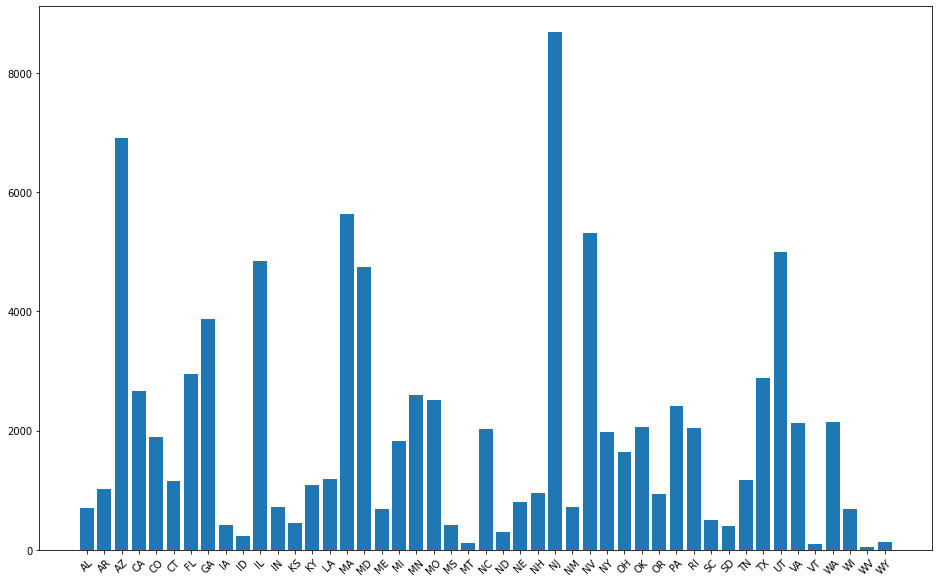

In [41]:
plt.figure(figsize = (16, 10))
plt.bar(np.arange(df['state'].nunique()), df.groupby('state').sum()['cnt']/df.groupby('state').count()['cnt'])
plt.xticks(np.arange(df['state'].nunique()), df.groupby('state').sum()['cnt'].index, rotation=45, size=10)
plt.show()

In [ ]:
df['state'].value_counts()

CA    20
TX    17
FL    15
NY     9
CO     9
NC     8
IL     7
VA     7
WY     6
GA     6
OR     6
LA     6
WI     6
MS     5
AL     5
PA     5
MT     5
ID     5
TN     5
SC     4
KY     4
IN     4
OH     4
WA     4
ND     4
MI     4
MO     4
AZ     3
IA     3
AR     3
MN     3
KS     2
SD     2
NE     2
NM     2
OK     2
UT     2
NV     2
WV     2
CT     1
NH     1
RI     1
ME     1
NJ     1
MD     1
MA     1
VT     1
Name: state, dtype: int64

#Symbol Maps

In [44]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_us_cities.csv')
df.head()

df['text'] = df['name'] + '<br>Population ' + (df['pop']/1e6).astype(str)+' million'
limits = [(0,2),(3,10),(11,20),(21,50),(50,3000)]
colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)","lightgrey"]
cities = []
scale = 5000

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df[lim[0]:lim[1]]
    city = go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['lon'],
        lat = df_sub['lat'],
        text = df_sub['text'],
        marker = go.scattergeo.Marker(
            symbol = 'square',
            size = df_sub['pop']/scale,
            color = colors[i],
            line = go.scattergeo.marker.Line(
                width=0.5, color='rgb(40,40,40)'
            ),
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1]) )
    cities.append(city)

layout = go.Layout(
        geo = go.layout.Geo(
            scope = 'usa',
            projection = go.layout.geo.Projection(
                type='albers usa'
            ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        )
    )

fig = go.Figure(data=cities, layout=layout)

In [45]:
fig.show()

# Folium

In [46]:
import folium
import json

In [47]:
m = folium.Map(location = [40.2, 44.6])
m

In [60]:
armenia_border = json.load(open("./drive/MyDrive/geo/gadm36_ARM_1.json"))

In [61]:
armenia_border

{'crs': {'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'},
  'type': 'name'},
 'features': [{'geometry': {'coordinates': [[[[44.4400100708008,
        40.6879425048829],
       [44.4386672973633, 40.6812248229982],
       [44.4504966735841, 40.6717605590821],
       [44.4646949768066, 40.656379699707],
       [44.4729766845703, 40.6398162841797],
       [44.49072265625, 40.6256217956543],
       [44.4990043640136, 40.6149711608887],
       [44.5084686279297, 40.6078720092775],
       [44.5380477905273, 40.6007766723633],
       [44.5664405822754, 40.5984077453614],
       [44.5889205932618, 40.5936775207521],
       [44.5948333740236, 40.5936775207521],
       [44.5924682617188, 40.5747451782227],
       [44.5841865539551, 40.5510864257812],
       [44.56880569458, 40.5297889709474],
       [44.5522422790527, 40.5132255554199],
       [44.5380477905273, 40.5132255554199],
       [44.5404129028321, 40.4966621398926],
       [44.5415954589845, 40.4789161682129],
       [44.5321311

In [63]:
armenia_wiki = pd.read_html('https://en.wikipedia.org/wiki/Armenia')

In [64]:
len(armenia_wiki)

43

In [69]:
arm_population = armenia_wiki[1]

In [70]:
arm_population.head()

,Province,Province.1,Capital,Capital.1,Area (km2),Population †
0,Aragatsotn,Արագածոտն,Ashtarak,Աշտարակ,2756,132925
1,Ararat,Արարատ,Artashat,Արտաշատ,2090,260367
2,Armavir,Արմավիր,Armavir,Արմավիր,1242,265770
3,Gegharkunik,Գեղարքունիք,Gavar,Գավառ,5349,235075
4,Kotayk,Կոտայք,Hrazdan,Հրազդան,2086,254397


In [71]:
arm_population.columns = ['province_eng', 'province_arm', 'capital_eng', 'capital_arm', 'area', 'population']

In [72]:
arm_population['population_density'] = arm_population['population']/arm_population['area']

In [73]:
arm_population

,province_eng,province_arm,capital_eng,capital_arm,area,population,population_density
0,Aragatsotn,Արագածոտն,Ashtarak,Աշտարակ,2756,132925,48.231132
1,Ararat,Արարատ,Artashat,Արտաշատ,2090,260367,124.577512
2,Armavir,Արմավիր,Armavir,Արմավիր,1242,265770,213.985507
3,Gegharkunik,Գեղարքունիք,Gavar,Գավառ,5349,235075,43.947467
4,Kotayk,Կոտայք,Hrazdan,Հրազդան,2086,254397,121.954458
5,Lori,Լոռի,Vanadzor,Վանաձոր,3799,235537,61.999737
6,Shirak,Շիրակ,Gyumri,Գյումրի,2680,251941,94.007836
7,Syunik,Սյունիք,Kapan,Կապան,4506,141771,31.462716
8,Tavush,Տավուշ,Ijevan,Իջևան,2704,128609,47.562500
9,Vayots Dzor,Վայոց Ձոր,Yeghegnadzor,Եղեգնաձոր,2308,52324,22.670711


In [74]:
m = folium.Map(location=[40.2, 44.6])
folium.Choropleth(geo_data = armenia_border, data = arm_population,
                      columns = ["province_eng", "population"],
             fill_color='YlGnBu',
                  key_on = "feature.properties.NAME_1",
               fill_opacity=0.7, line_opacity=0.2,
                 highlight = True
                 ).add_to(m)
m

In [75]:
m = folium.Map(location = [40.2, 44.6])

folium.Choropleth(geo_data = armenia_border,
                 data = arm_population,
                 columns = ['province_eng', 'population_density'],
                  fill_color = 'Blues',
                  key_on = 'feature.properties.NAME_1',
                  fill_opacity = 1,
                  line_opacity = 0.2,
                  highlight = True
                 ).add_to(m)

m


In [76]:
geo_json_data = json.load(open("./drive/MyDrive/geo/us-counties.json"))

In [77]:
m = folium.Map([43, -100], zoom_start=4)
folium.GeoJson(geo_json_data).add_to(m)
m

In [78]:
df = []
for i in range(len(geo_json_data["features"])):
    df.append([geo_json_data["features"][i]["id"], np.random.normal(10000, 50000)])

In [80]:
df = pd.DataFrame(df, columns=["location", "value"])

In [81]:
m = folium.Map(location=[43, -100], zoom_start=4)

In [82]:
folium.Choropleth(geo_data = geo_json_data, data = df,
                      columns = ["location", "value"],
             fill_color='YlGnBu',
                  key_on = "feature.id",
               fill_opacity=0.7, line_opacity=0.2,
                 highlight = True
                 ).add_to(m)
m

Output hidden; open in https://colab.research.google.com to view.

In [83]:
bins = list(df['value'].quantile(np.linspace(0, 1, 11)))

In [90]:
m = folium.Map(location=[43, -100], zoom_start=4)

folium.Choropleth(geo_data = geo_json_data, data = df,
                      columns = ["location", "value"],
             fill_color='RdYlBu',
                  key_on = "feature.id",
               fill_opacity=0.7, line_opacity=0.2,
                 highlight = True, bins = bins
                 ).add_to(m)

In [91]:
m

Output hidden; open in https://colab.research.google.com to view.

More about [colorbrew](https://github.com/dsc/colorbrewer-python)

#Adding Markers

In [94]:
import folium
import pandas as pd
 
data = pd.DataFrame({
'lat':[-58, 2, 145, 30.32, -4.03, -73.57, 36.82, -38.5],
'lon':[-34, 49, -38, 59.93, 5.33, 45.52, -1.29, -12.97],
'name':['Buenos Aires', 'Paris', 'melbourne', 'St Petersbourg', 'Abidjan', 'Montreal', 'Nairobi', 'Salvador']
})
 

m = folium.Map(location=[20, 0], zoom_start=2)
 

for i in range(0,len(data)):
    folium.Marker([data.iloc[i]['lon'], data.iloc[i]['lat']], popup=data.iloc[i]['name']).add_to(m)

In [95]:
m

#Adding pattern styles

In [96]:
import folium
from folium import plugins

In [97]:
m = folium.Map([40., -105.], zoom_start=4)

remote_url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json'
stripes = plugins.pattern.StripePattern(angle=-45)
stripes.add_to(m)

circles = plugins.pattern.CirclePattern(width=20, height=20, radius=5, fill_opacity=0.5, opacity=1)
circles.add_to(m)

def style_function(feature):
    default_style = {
        'opacity':1.0,
        'fillColor': '#ffff00',
        'color': 'black',
        'weight': 2
    }
        
    if feature['properties']['name']  == 'Texas':
        default_style['fillPattern'] = stripes
        default_style['fillOpacity'] = 1.0
        
    if feature['properties']['name']  == 'California':
        default_style['fillPattern'] = circles
        default_style['fillOpacity'] = 1.0
        
    return default_style

# Adding remote GeoJSON as additional layer.
folium.GeoJson(remote_url, smooth_factor=0.5, style_function=style_function).add_to(m)

m

#Time

In [98]:
import folium

In [101]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 4.9 MB/s 
     |████████████████████████████████| 6.3 MB 44.3 MB/s 
     |████████████████████████████████| 16.7 MB 334 kB/s 


In [102]:
import geopandas as gpd
datapath = gpd.datasets.get_path('naturalearth_lowres')
gdf = gpd.read_file(datapath)

In [113]:
gdf

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [103]:
import pandas as pd

n_periods, n_sample = 48, 40

datetime_index = pd.date_range('2016-1-1', periods=n_periods, freq='M')
dt_index_epochs = datetime_index.astype(int) // 10**9
dt_index = dt_index_epochs.astype('U10')

dt_index

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning:

casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



Index(['1454198400', '1456704000', '1459382400', '1461974400', '1464652800',
       '1467244800', '1469923200', '1472601600', '1475193600', '1477872000',
       '1480464000', '1483142400', '1485820800', '1488240000', '1490918400',
       '1493510400', '1496188800', '1498780800', '1501459200', '1504137600',
       '1506729600', '1509408000', '1512000000', '1514678400', '1517356800',
       '1519776000', '1522454400', '1525046400', '1527724800', '1530316800',
       '1532995200', '1535673600', '1538265600', '1540944000', '1543536000',
       '1546214400', '1548892800', '1551312000', '1553990400', '1556582400',
       '1559260800', '1561852800', '1564531200', '1567209600', '1569801600',
       '1572480000', '1575072000', '1577750400'],
      dtype='object')

In [104]:
import numpy as np
np.random.seed(42)

styledata = {}

for country in gdf.index:
    df = pd.DataFrame(
        {'color': np.random.normal(size=n_periods),
         'opacity': np.random.normal(size=n_periods)},
        index=dt_index
    )
    df = df.cumsum()
    df.sample(n_sample, replace=False).sort_index()
    styledata[country] = df

In [116]:
styledata[0]

,color,opacity
1454198400,#e9e4f1ff,0.438107
1456704000,#eae4f1ff,0.155797
1459382400,#e7e0efff,0.207691
1461974400,#decee5ff,0.146030
1464652800,#e0d1e7ff,0.037636
1467244800,#e1d4e8ff,0.135582
1469923200,#d8c1deff,0.300672
1472601600,#d4b8daff,0.449795
1475193600,#d6bddcff,0.315414
1477872000,#d4b7d9ff,0.265901


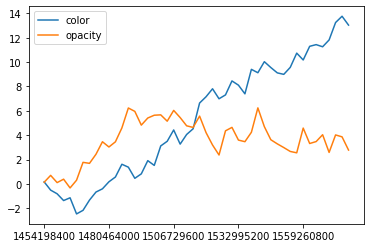

In [105]:
ax = df.plot()

In [106]:
max_color, min_color, max_opacity, min_opacity = 0, 0, 0, 0

for country, data in styledata.items():
    max_color = max(max_color, data['color'].max())
    min_color = min(max_color, data['color'].min())
    max_opacity = max(max_color, data['opacity'].max())
    max_opacity = min(max_color, data['opacity'].max())

In [107]:
from branca.colormap import linear
cmap = linear.PuRd_09.scale(min_color, max_color)


def norm(x):
    return (x - x.min()) / (x.max() - x.min())


for country, data in styledata.items():
    data['color'] = data['color'].apply(cmap)
    data['opacity'] = norm(data['opacity'])

In [108]:
cmap

In [109]:
styledict = {
    str(country): data.to_dict(orient='index') for
    country, data in styledata.items()
}

In [112]:
from folium.plugins import TimeSliderChoropleth

m = folium.Map([0, 0], zoom_start=2)

g = TimeSliderChoropleth(
    gdf.to_json(),
    styledict=styledict
).add_to(m)

m

Output hidden; open in https://colab.research.google.com to view.

In [111]:
m

Output hidden; open in https://colab.research.google.com to view.